##### Objetivo

O objetivo deste estudo é analisar os principais indicadores econômicos e sociais de um pais e sua relação com o indice de Gini. A ideia é verificar quais indicadores possuem mais destaque quando o indice é maior ou menor.

##### O que é o indice de Gini?

O índice de Gini, também conhecido como coeficiente de Gini, é um indicador socioeconômico que mede a 
desigualdade de distribuição de renda em um determinado país, estado, região ou município. 
Ele foi criado em 1912 pelo matemático italiano Conrado Gini.

O índice de Gini reflete a concentração de renda e as desigualdades socioeconômicas de um território. 
Neste estudo, seu valor varia entre 0 e 100:

Quanto mais próximo de 100, maior é a desigualdade na distribuição de renda entre a população.
Quanto mais próximo de 0, menor é essa desigualdade.

Cálculo: 
O índice de Gini é calculado com base na curva de Lorenz, 
levando em consideração a parcela mais rica e a parcela mais pobre da população de uma área.

Interpretação:
- Valor 0: Igualdade perfeita na distribuição de renda.
- Valor 100: Altíssima desigualdade e máxima concentração de renda.

Dataset escolhido para o estudo:

Foi escolhido para objeto de analise deste estudo o dataset https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators, que foi montado a partir de dados do Banco Mundial, com indicadores de desenvolvimento mundial medidos de 1960 a 2022.

Inclui dados macroeconômicos, sociais, políticos e ambientais de todos os países e regiões sobre os quais o Banco Mundial possui dados.

##### 1.Início da analise do dataset:

Importe das bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importe do arquivo CSV com os dados brutos:

In [2]:
df_kaggle = pd.read_csv('data_source/world_bank_development_indicators.csv')
df_kaggle.shape

(16780, 50)

In [3]:
df_kaggle.head(5)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.801696,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.893688,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,57.970348,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.066940,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


Chegando tipos e valores nulos:

In [4]:
df_kaggle.dtypes

country                                       object
date                                          object
agricultural_land%                           float64
forest_land%                                 float64
land_area                                    float64
avg_precipitation                            float64
trade_in_services%                           float64
control_of_corruption_estimate               float64
control_of_corruption_std                    float64
access_to_electricity%                       float64
renewvable_energy_consumption%               float64
electric_power_consumption                   float64
CO2_emisions                                 float64
other_greenhouse_emisions                    float64
population_density                           float64
inflation_annual%                            float64
real_interest_rate                           float64
risk_premium_on_lending                      float64
research_and_development_expenditure%        f

In [5]:
print(type (df_kaggle['date'][1]))

<class 'str'>


In [6]:
df_kaggle.isnull().sum()

country                                          0
date                                             0
agricultural_land%                            1482
forest_land%                                  8866
land_area                                     1172
avg_precipitation                             6694
trade_in_services%                            7615
control_of_corruption_estimate               12216
control_of_corruption_std                    12216
access_to_electricity%                        9432
renewvable_energy_consumption%                8704
electric_power_consumption                    8990
CO2_emisions                                  9372
other_greenhouse_emisions                     9372
population_density                            1201
inflation_annual%                             6005
real_interest_rate                           12383
risk_premium_on_lending                      14413
research_and_development_expenditure%        14004
central_goverment_debt%        

In [7]:
totalRecordsForCountrys = df_kaggle['country'].nunique()
print(totalRecordsForCountrys)

268


##### 2. Tratamento dos dados:

Drop das linhas que contém gini_index nulo:

In [8]:
df_gini = df_kaggle.copy()
df_gini = df_gini.dropna(subset=['gini_index'])
df_gini.shape

(1936, 50)

In [9]:
df_gini.head(5)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
225,Albania,1996-01-01,41.277372,28.361314,27400.0,1485.0,9.957368,-0.893903,0.315914,100.000000,...,NaN,27.0,20.987,5.571,74.592,3168033.0,1917515.0,-0.648298,0.225411,8.314658
231,Albania,2002-01-01,41.605839,28.169854,27400.0,1485.0,26.959328,-0.845341,0.217465,99.404579,...,NaN,31.7,15.209,5.953,75.890,3051010.0,1723790.0,-0.008150,0.169132,6.915206
234,Albania,2005-01-01,39.306569,28.309672,27400.0,1485.0,32.905110,-0.813264,0.160477,99.371124,...,NaN,30.6,13.235,6.306,76.621,3011487.0,1604189.0,0.003672,0.172000,5.078094
237,Albania,2008-01-01,43.102190,28.449489,27400.0,1485.0,39.656173,-0.605212,0.144491,100.000000,...,NaN,30.0,11.868,6.570,77.653,2947314.0,1473922.0,0.174939,0.134313,3.150738
241,Albania,2012-01-01,43.843066,28.646606,27400.0,1485.0,34.926581,-0.778729,0.128089,99.900000,...,NaN,29.0,12.227,7.573,78.064,2900401.0,1324613.0,0.022064,0.117872,5.428407


In [10]:
df_gini.reset_index(drop=True, inplace=True)
df_gini.head(5)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Albania,1996-01-01,41.277372,28.361314,27400.0,1485.0,9.957368,-0.893903,0.315914,100.000000,...,NaN,27.0,20.987,5.571,74.592,3168033.0,1917515.0,-0.648298,0.225411,8.314658
1,Albania,2002-01-01,41.605839,28.169854,27400.0,1485.0,26.959328,-0.845341,0.217465,99.404579,...,NaN,31.7,15.209,5.953,75.890,3051010.0,1723790.0,-0.008150,0.169132,6.915206
2,Albania,2005-01-01,39.306569,28.309672,27400.0,1485.0,32.905110,-0.813264,0.160477,99.371124,...,NaN,30.6,13.235,6.306,76.621,3011487.0,1604189.0,0.003672,0.172000,5.078094
3,Albania,2008-01-01,43.102190,28.449489,27400.0,1485.0,39.656173,-0.605212,0.144491,100.000000,...,NaN,30.0,11.868,6.570,77.653,2947314.0,1473922.0,0.174939,0.134313,3.150738
4,Albania,2012-01-01,43.843066,28.646606,27400.0,1485.0,34.926581,-0.778729,0.128089,99.900000,...,NaN,29.0,12.227,7.573,78.064,2900401.0,1324613.0,0.022064,0.117872,5.428407


Verificando quandos registros foram mantidos e excluídos, tendo como base a coluna de países ('country'):

In [11]:
totalRecordsWithGiniIndex = df_gini['country'].nunique()
print('Total de registros COM indice gini:', totalRecordsWithGiniIndex)
print('Total de registros SEM indice gini:', totalRecordsForCountrys - totalRecordsWithGiniIndex)

Total de registros COM indice gini: 167
Total de registros SEM indice gini: 101


Convertendo a coluna de data de string para tipo date:

In [12]:
df_gini_copy = df_gini.copy()
df_gini_copy['date'] = pd.to_datetime(df_gini_copy['date'])
print(type (df_gini_copy['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Verificando a distribuição da quantidade de países por ano em ordem crescente:

In [13]:
df_gini_copy.sort_values(by='date', ascending=False, inplace=True)

<Axes: xlabel='date', ylabel='count'>

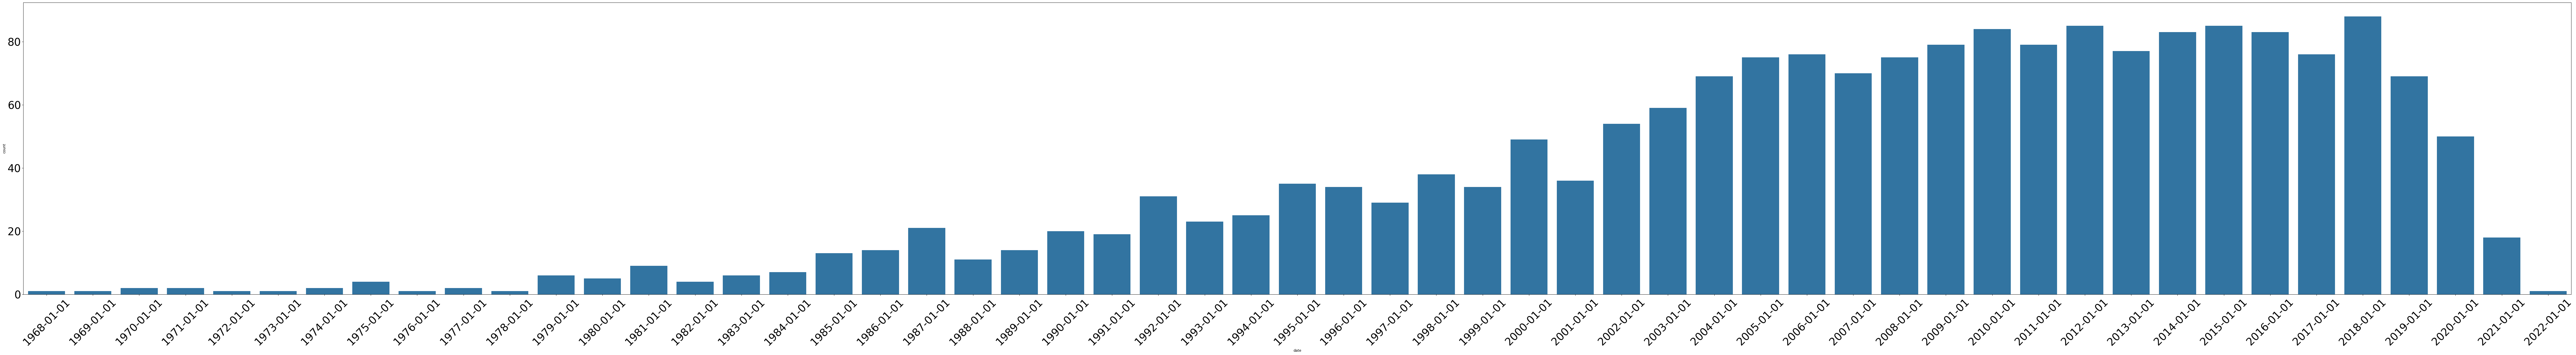

In [30]:
plt.figure(figsize=(130, 15))
plt.xticks(rotation=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


sns.countplot(x='date', data=df_gini_copy.sort_values(by='date'))

Definindo a década alvo dos estudos, que será a os ulitmos 10 anos antes da pandemia de covid-19, no inicio de 2020:

In [31]:
df_gini_decade = df_gini_copy[(df_gini_copy['date'] >= '2009-01-01') & (df_gini_copy['date'] < '2020-01-01')]
df_gini_decade.shape

(888, 50)

In [32]:
df_gini_decade.reset_index(drop=True, inplace=True)
df_gini_decade.head(5)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Sweden,2019-01-01,7.377611,68.699061,407283.59,624.0,28.604765,2.128221,0.144099,100.000000,...,18.80,29.3,11.100,8.600,83.109756,10278887.0,1263481.0,1.560920,0.121992,1.081037
1,Sri Lanka,2019-01-01,45.447295,34.206710,61864.47,1712.0,13.592342,-0.281439,0.146822,99.761353,...,16.00,37.7,14.534,7.072,76.008000,21803000.0,17750912.0,-0.088469,0.120973,3.427305
2,Dominican Republic,2019-01-01,50.279445,44.214655,48310.00,1410.0,15.262526,-0.819770,0.141026,99.000000,...,16.40,41.9,19.291,6.006,73.577000,10881882.0,1977456.0,0.180308,0.122428,9.428516
3,Ecuador,2019-01-01,21.460783,50.580206,248360.00,2274.0,6.840200,-0.488087,0.141026,99.090000,...,38.13,45.7,17.338,4.913,77.297000,17343740.0,6246175.0,0.032743,0.122428,6.843968
4,Denmark,2019-01-01,65.649125,15.687500,40000.00,703.0,46.177683,2.158069,0.145308,100.000000,...,16.50,27.7,10.500,9.300,81.451220,5814422.0,698080.0,1.545183,0.123188,1.138740


Verificando quantitativos e valores nulos no novo dataset:

In [33]:
df_gini_decade.isnull().sum()

country                                        0
date                                           0
agricultural_land%                            10
forest_land%                                  10
land_area                                     10
avg_precipitation                             33
trade_in_services%                            14
control_of_corruption_estimate                 1
control_of_corruption_std                      1
access_to_electricity%                         9
renewvable_energy_consumption%                10
electric_power_consumption                   437
CO2_emisions                                  13
other_greenhouse_emisions                     13
population_density                            10
inflation_annual%                             13
real_interest_rate                           336
risk_premium_on_lending                      603
research_and_development_expenditure%        215
central_goverment_debt%                      468
tax_revenue%        

In [35]:
totalRecordCountry = df_gini_decade['country'].nunique()
print(totalRecordCountry)

156


Exclusão das colunas:
1) Com mais de 400 valores nulos
2) Indicadores que não são indices de qualidade de um setor/segmento ou não medidos em % do PIB (GDP)
3) Indicadores relacionados a clima ou tamanho do território
4) Indicadores sociais, exceto os relativos a total população e acesso a eletricidade

In [36]:
columns_for_drop = ['electric_power_consumption',
                    'agricultural_land%', 
                    'forest_land%', 
                    'avg_precipitation', 
                    'control_of_corruption_std', 
                    'other_greenhouse_emisions', 
                    'risk_premium_on_lending', 
                    'central_goverment_debt%', 
                    'goverment_effectiveness_std', 
                    'human_capital_index', 
                    'doing_business', 
                    'time_to_get_operation_license', 
                    'statistical_performance_indicators', 
                    'logistic_performance_index', 
                    'political_stability_std', 
                    'rule_of_law_std', 
                    'regulatory_quality_std', 
                    'multidimensional_poverty_headcount_ratio%', 
                    'birth_rate', 
                    'death_rate', 
                    'rural_population', 
                    'voice_and_accountability_estimate', 
                    'voice_and_accountability_std',
                    'land_area',
                    'renewvable_energy_consumption%',
                    'CO2_emisions',
                    'individuals_using_internet%',
                    'life_expectancy_at_birth']

print(len(columns_for_drop))

28


In [37]:
df_gini_decade = df_gini_decade.drop(columns=columns_for_drop)
df_gini_decade.shape

(888, 22)

Verificando a distribuição de registros por país:

In [38]:
df_gini_decade['country'].value_counts(dropna=False)

country
Sweden              11
Moldova             11
Paraguay            11
Latvia              11
Panama              11
                    ..
Kenya                1
Angola               1
Gabon                1
St. Lucia            1
Papua New Guinea     1
Name: count, Length: 156, dtype: int64

<Axes: >

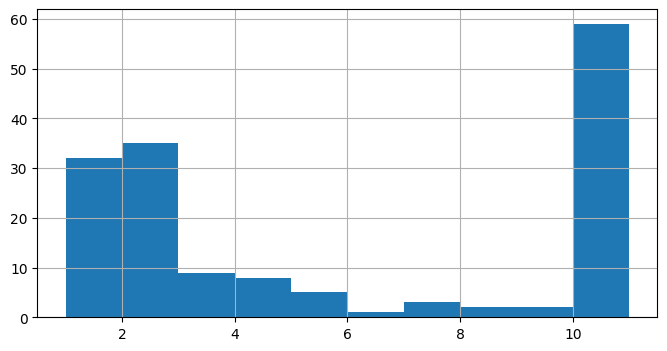

In [39]:
df_gini_decade['country'].value_counts(dropna=False).hist(figsize=(8,4))

##### 3. Análise de inicial dos dados:

1) Verificar os países com os 10 melhores e piores índices gini;
2) Verificar os 10 países com maior PIB (GDP) e se o indice gini reflete um gini index considerado bom (abaixo de 40)

In [40]:
# Ordenar a ocorrência de dados mais recente de cada país:
df_most_recent = df_gini_decade.copy()
df_most_recent.sort_values(by='date', ascending=False, inplace=True)
df_most_recent.head(5)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
0,Sweden,2019-01-01,28.604765,2.128221,100.000000,25.237665,1.784151,NaN,3.38758,27.412702,...,1.093409,5.338795e+11,1.039473,1.823913,1.800265,7.63851,9.220854,29.3,10278887.0,1.081037
44,Ireland,2019-01-01,145.079595,1.491115,100.000000,71.626361,0.939044,NaN,1.22589,17.695767,...,0.279145,3.993217e+11,0.966389,1.376060,1.600420,3.29461,4.980219,30.8,4934340.0,0.653592
50,Slovak Republic,2019-01-01,21.956835,0.213700,100.000000,113.438998,2.664561,NaN,0.82574,18.784125,...,1.711891,1.057101e+11,0.667158,0.523337,1.005048,4.29046,5.475914,23.2,5454147.0,1.393492
49,Moldova,2019-01-01,23.197822,-0.623985,100.000000,92.756094,4.837784,2.751059,0.23672,17.656290,...,0.355073,1.173577e+10,-0.393240,-0.427145,-0.035522,6.10379,3.801009,26.0,2664224.0,3.891312
48,Fiji,2019-01-01,43.816784,0.727741,96.094048,50.271757,1.773102,3.700959,NaN,22.737135,...,1.455351,5.481693e+09,0.777670,0.466518,0.048883,5.06788,2.495265,30.7,918465.0,NaN


Manter a única ocorrência mais recente de cada país:

In [41]:
df_unique = df_most_recent.groupby('country').first()
df_unique.shape

(156, 21)

In [42]:
df_unique.head(5)

,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,expense%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
country,,,,,,,,,,,,,,,,,,,,,
Albania,2019-01-01,40.263896,-0.543374,100.000000,104.167555,1.411091,4.956504,NaN,18.144377,23.150655,...,1.299676,1.540183e+10,0.111169,-0.402843,0.285659,3.91665,2.867304,30.1,2854191.0,2.261748
Algeria,2011-01-01,8.096536,-0.572700,99.002655,15.343212,4.524212,-8.651090,NaN,NaN,NaN,...,4.325706,2.000131e+11,-1.360561,-0.845335,-1.212380,NaN,3.719759,27.6,36543541.0,0.766209
Angola,2018-01-01,13.780983,-1.180501,45.290000,25.085051,19.630594,-5.844003,NaN,9.644779,15.607658,...,1.871776,7.779294e+10,-0.335692,-0.986208,-0.785790,2.04470,1.103910,51.3,31273533.0,NaN
Argentina,2019-01-01,7.693502,-0.083663,100.000000,16.420827,NaN,12.103970,0.45713,10.594398,22.036481,...,0.706187,4.477547e+11,-0.091444,-0.408075,-0.436933,4.72417,6.059421,42.9,44938712.0,5.155823
Armenia,2019-01-01,36.377041,-0.203820,100.000000,99.072778,1.443447,10.959579,0.17854,22.285171,21.758481,...,4.787706,1.361929e+10,-0.413424,-0.157183,0.255927,2.56185,1.411674,30.0,2820602.0,2.588100


In [43]:
df_unique.reset_index(inplace=True)
df_unique.shape

(156, 22)

In [44]:
df_unique.head(5)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
0,Albania,2019-01-01,40.263896,-0.543374,100.000000,104.167555,1.411091,4.956504,NaN,18.144377,...,1.299676,1.540183e+10,0.111169,-0.402843,0.285659,3.91665,2.867304,30.1,2854191.0,2.261748
1,Algeria,2011-01-01,8.096536,-0.572700,99.002655,15.343212,4.524212,-8.651090,NaN,NaN,...,4.325706,2.000131e+11,-1.360561,-0.845335,-1.212380,NaN,3.719759,27.6,36543541.0,0.766209
2,Angola,2018-01-01,13.780983,-1.180501,45.290000,25.085051,19.630594,-5.844003,NaN,9.644779,...,1.871776,7.779294e+10,-0.335692,-0.986208,-0.785790,2.04470,1.103910,51.3,31273533.0,NaN
3,Argentina,2019-01-01,7.693502,-0.083663,100.000000,16.420827,NaN,12.103970,0.45713,10.594398,...,0.706187,4.477547e+11,-0.091444,-0.408075,-0.436933,4.72417,6.059421,42.9,44938712.0,5.155823
4,Armenia,2019-01-01,36.377041,-0.203820,100.000000,99.072778,1.443447,10.959579,0.17854,22.285171,...,4.787706,1.361929e+10,-0.413424,-0.157183,0.255927,2.56185,1.411674,30.0,2820602.0,2.588100


In [45]:
df_sorted_gini = df_unique.sort_values(by='gini_index')
df_sorted_gini.head(5)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
124,Slovak Republic,2019-01-01,21.956835,0.213700,100.0,113.438998,2.664561,NaN,0.82574,18.784125,...,1.711891,1.057101e+11,0.667158,0.523337,1.005048,4.29046,5.475914,23.2,5454147.0,1.393492
125,Slovenia,2019-01-01,29.669400,0.918282,100.0,103.711935,1.630523,NaN,2.04704,18.334505,...,1.057303,5.433159e+10,0.807429,1.111910,1.007108,4.91029,6.168231,24.4,2088385.0,0.662596
33,Czechia,2019-01-01,22.271704,0.561193,100.0,138.226810,2.847876,-0.195325,1.92773,14.768770,...,1.152521,2.525482e+11,0.943887,1.046310,1.243493,4.54338,6.438998,25.3,10671870.0,0.920577
8,Belarus,2019-01-01,24.055384,0.032412,100.0,46.410751,5.598156,0.411160,0.57733,13.301516,...,1.200865,6.441011e+10,0.332389,-0.836098,-0.663383,4.97948,4.125269,25.3,9419758.0,2.325829
92,Moldova,2019-01-01,23.197822,-0.623985,100.0,92.756094,4.837784,2.751059,0.23672,17.656290,...,0.355073,1.173577e+10,-0.393240,-0.427145,-0.035522,6.10379,3.801009,26.0,2664224.0,3.891312


1) Vericando os 10 países com melhor e os 10 países com pior índice gini:

In [46]:
df_first_10 = df_sorted_gini.iloc[:10]
df_first_10.shape

(10, 22)

In [47]:
df_first_10.head(1)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
124,Slovak Republic,2019-01-01,21.956835,0.2137,100.0,113.438998,2.664561,NaN,0.82574,18.784125,...,1.711891,1.057101e+11,0.667158,0.523337,1.005048,4.29046,5.475914,23.2,5454147.0,1.393492


In [48]:
df_first_10.reset_index(drop=True, inplace=True)
df_first_10.head(1)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
0,Slovak Republic,2019-01-01,21.956835,0.2137,100.0,113.438998,2.664561,NaN,0.82574,18.784125,...,1.711891,1.057101e+11,0.667158,0.523337,1.005048,4.29046,5.475914,23.2,5454147.0,1.393492


In [49]:
print("10 países com  melhor índice gini:")
df_first_10[['country', 'gini_index', 'date']]

10 países com  melhor índice gini:


,country,gini_index,date
0,Slovak Republic,23.2,2019-01-01
1,Slovenia,24.4,2019-01-01
2,Czechia,25.3,2019-01-01
3,Belarus,25.3,2019-01-01
4,Moldova,26.0,2019-01-01
5,United Arab Emirates,26.0,2018-01-01
6,Iceland,26.1,2017-01-01
7,Ukraine,26.6,2019-01-01
8,Belgium,27.2,2019-01-01
9,Algeria,27.6,2011-01-01


In [50]:
df_last_10 = df_sorted_gini.iloc[-10:]
print("10 países com  pior índice gini:")
df_last_10[['country', 'gini_index', 'date']]

10 países com  pior índice gini:


,country,gini_index,date
131,St. Lucia,51.2,2016-01-01
25,Colombia,51.3,2019-01-01
2,Angola,51.3,2018-01-01
14,Botswana,53.3,2015-01-01
15,Brazil,53.5,2019-01-01
96,Mozambique,54.0,2014-01-01
41,Eswatini,54.6,2016-01-01
154,Zambia,57.1,2015-01-01
98,Namibia,59.1,2015-01-01
127,South Africa,63.0,2014-01-01


2) Comparar o gini_index com o PIB (GDP) do país:

Um índice de Gini excelente varia de acordo com o contexto e as metas específicas de cada país ou região. No entanto, em geral, um índice de Gini abaixo de 0,3 é frequentemente considerado muito bom e reflete uma distribuição de renda mais equitativa. Isso significa que a diferença entre os mais pobres e os mais ricos é relativamente pequena.

Para fornecer uma referência mais ampla:

30 ou menos: Excelente (baixa desigualdade)

30 a 40: Bom (desigualdade moderada)

40 a 50: Aceitável (desigualdade considerável)

Acima de 50: Alta desigualdade

In [51]:
df_unique.shape

(156, 22)

In [52]:
df_sorted_GDP = df_unique.copy()

In [53]:
df_sorted_GDP.head(6)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
0,Albania,2019-01-01,40.263896,-0.543374,100.000000,104.167555,1.411091,4.956504,NaN,18.144377,...,1.299676,1.540183e+10,0.111169,-0.402843,0.285659,3.91665,2.867304,30.1,2854191.0,2.261748
1,Algeria,2011-01-01,8.096536,-0.572700,99.002655,15.343212,4.524212,-8.651090,NaN,NaN,...,4.325706,2.000131e+11,-1.360561,-0.845335,-1.212380,NaN,3.719759,27.6,36543541.0,0.766209
2,Angola,2018-01-01,13.780983,-1.180501,45.290000,25.085051,19.630594,-5.844003,NaN,9.644779,...,1.871776,7.779294e+10,-0.335692,-0.986208,-0.785790,2.04470,1.103910,51.3,31273533.0,NaN
3,Argentina,2019-01-01,7.693502,-0.083663,100.000000,16.420827,NaN,12.103970,0.45713,10.594398,...,0.706187,4.477547e+11,-0.091444,-0.408075,-0.436933,4.72417,6.059421,42.9,44938712.0,5.155823
4,Armenia,2019-01-01,36.377041,-0.203820,100.000000,99.072778,1.443447,10.959579,0.17854,22.285171,...,4.787706,1.361929e+10,-0.413424,-0.157183,0.255927,2.56185,1.411674,30.0,2820602.0,2.588100
5,Australia,2018-01-01,10.052801,1.801111,100.000000,3.245785,1.911401,3.370036,2.37286,23.197432,...,1.890112,1.428267e+12,0.989604,1.706054,1.901642,5.12345,7.203527,34.3,24966643.0,0.884735


In [54]:
df_sorted_GDP = df_sorted_GDP.sort_values(by='GDP_current_US', ascending=False)
df_sorted_GDP.head(6)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
148,United States,2019-01-01,6.944388,1.211969,100.000000,35.893176,1.812210,3.427090,3.16609,9.960870,...,3.426195,2.138098e+13,0.134975,1.453736,1.343764,4.98871,8.595796,41.5,3.283300e+08,4.985947
24,China,2019-01-01,5.251183,-0.289006,100.000000,149.367573,2.899234,3.024385,2.24463,8.492864,...,1.727828,1.427997e+13,-0.256689,-0.243998,-0.288801,3.54000,2.995034,38.2,1.407745e+09,0.518967
66,Japan,2013-01-01,5.876008,1.648278,100.000000,349.643347,0.335038,1.664022,3.27896,NaN,...,0.950866,5.212328e+12,1.019142,1.436062,1.108955,3.62497,8.994335,32.9,1.274450e+08,0.289789
49,Germany,2019-01-01,19.244764,1.900067,100.000000,237.822954,1.445660,NaN,3.16770,11.408561,...,1.260268,3.888226e+12,0.574309,1.612633,1.721608,5.11664,9.025120,31.7,8.309296e+07,0.749265
147,United Kingdom,2019-01-01,25.009038,1.782681,100.000000,276.263080,1.738105,-0.767984,1.70799,25.039315,...,1.976480,2.857058e+12,0.539732,1.598685,1.624372,5.20775,7.922252,32.8,6.683633e+07,1.150068
59,India,2019-01-01,12.177175,-0.279873,95.885941,465.194639,3.729506,6.894875,0.65573,12.017428,...,2.519121,2.835606e+12,-0.770800,-0.042570,-0.137946,4.40723,0.985411,35.7,1.383112e+09,2.926661


In [55]:
# Selecionando os 10 primeiros:
df_GDP_first_10 = df_sorted_GDP.iloc[:10]
df_GDP_first_10.shape

(10, 22)

In [56]:
df_sorted_GDP.head(1)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
148,United States,2019-01-01,6.944388,1.211969,100.0,35.893176,1.81221,3.42709,3.16609,9.96087,...,3.426195,2.138098e+13,0.134975,1.453736,1.343764,4.98871,8.595796,41.5,328329953.0,4.985947


In [57]:
print(type (df_sorted_GDP['GDP_current_US'][148]))

<class 'numpy.float64'>


In [58]:
df_GDP_first_10.head(1)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
148,United States,2019-01-01,6.944388,1.211969,100.0,35.893176,1.81221,3.42709,3.16609,9.96087,...,3.426195,2.138098e+13,0.134975,1.453736,1.343764,4.98871,8.595796,41.5,328329953.0,4.985947


In [59]:
print(type (df_GDP_first_10['GDP_current_US'][148]))

<class 'numpy.float64'>


Convertendo o formato da coluna para monetário:

In [60]:
df_GDP_first_10.loc[:, 'GDP_current_US'] = df_GDP_first_10['GDP_current_US'].map('${:,.2f}'.format)

C:\Users\021042631\AppData\Local\Temp\ipykernel_12452\1650042453.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['$21,380,976,119,000.00' '$14,279,968,485,748.00' '$5,212,328,181,166.18'
 '$3,888,226,035,921.49' '$2,857,057,847,953.02' '$2,835,606,242,052.48'
 '$2,728,870,246,705.83' '$2,011,302,198,827.41' '$1,873,288,159,000.64'
 '$1,725,297,938,435.76']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_GDP_first_10.loc[:, 'GDP_current_US'] = df_GDP_first_10['GDP_current_US'].map('${:,.2f}'.format)


In [61]:
print(type (df_GDP_first_10['GDP_current_US'][148]))

<class 'str'>


In [62]:
df_GDP_first_10.reset_index(drop=True, inplace=True)
df_GDP_first_10

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
0,United States,2019-01-01,6.944388,1.211969,100.000000,35.893176,1.812210,3.427090,3.16609,9.960870,...,3.426195,"$21,380,976,119,000.00",0.134975,1.453736,1.343764,4.98871,8.595796,41.5,3.283300e+08,4.985947
1,China,2019-01-01,5.251183,-0.289006,100.000000,149.367573,2.899234,3.024385,2.24463,8.492864,...,1.727828,"$14,279,968,485,748.00",-0.256689,-0.243998,-0.288801,3.54000,2.995034,38.2,1.407745e+09,0.518967
2,Japan,2013-01-01,5.876008,1.648278,100.000000,349.643347,0.335038,1.664022,3.27896,NaN,...,0.950866,"$5,212,328,181,166.18",1.019142,1.436062,1.108955,3.62497,8.994335,32.9,1.274450e+08,0.289789
3,Germany,2019-01-01,19.244764,1.900067,100.000000,237.822954,1.445660,NaN,3.16770,11.408561,...,1.260268,"$3,888,226,035,921.49",0.574309,1.612633,1.721608,5.11664,9.025120,31.7,8.309296e+07,0.749265
4,United Kingdom,2019-01-01,25.009038,1.782681,100.000000,276.263080,1.738105,-0.767984,1.70799,25.039315,...,1.976480,"$2,857,057,847,953.02",0.539732,1.598685,1.624372,5.20775,7.922252,32.8,6.683633e+07,1.150068
5,India,2019-01-01,12.177175,-0.279873,95.885941,465.194639,3.729506,6.894875,0.65573,12.017428,...,2.519121,"$2,835,606,242,052.48",-0.770800,-0.042570,-0.137946,4.40723,0.985411,35.7,1.383112e+09,2.926661
6,France,2019-01-01,20.619033,1.279630,100.000000,123.070294,1.108255,NaN,2.19179,24.514663,...,1.836461,"$2,728,870,246,705.83",0.299382,1.400215,1.438735,5.35443,8.342061,31.2,6.738800e+07,1.169259
7,Italy,2019-01-01,12.188219,0.260286,100.000000,201.980546,0.611247,1.648917,1.46299,24.576705,...,1.312762,"$2,011,302,198,827.41",0.404385,0.298781,0.953210,4.09531,6.383605,34.6,5.972908e+07,0.530740
8,Brazil,2019-01-01,5.580945,-0.386171,99.800000,25.338518,3.732976,31.903073,1.20803,13.737695,...,1.379457,"$1,873,288,159,000.64",-0.713788,-0.203433,-0.109311,5.96347,3.917019,53.5,2.117829e+08,20.810464
9,Canada,2018-01-01,13.189683,1.823798,100.000000,4.134149,2.268226,0.131627,1.67917,13.057685,...,1.324681,"$1,725,297,938,435.76",0.979126,1.747119,1.704930,4.88898,7.577101,32.5,3.706508e+07,1.787486


In [63]:
df_GDP_first_10[['country', 'gini_index', 'date', 'GDP_current_US']]

,country,gini_index,date,GDP_current_US
0,United States,41.5,2019-01-01,"$21,380,976,119,000.00"
1,China,38.2,2019-01-01,"$14,279,968,485,748.00"
2,Japan,32.9,2013-01-01,"$5,212,328,181,166.18"
3,Germany,31.7,2019-01-01,"$3,888,226,035,921.49"
4,United Kingdom,32.8,2019-01-01,"$2,857,057,847,953.02"
5,India,35.7,2019-01-01,"$2,835,606,242,052.48"
6,France,31.2,2019-01-01,"$2,728,870,246,705.83"
7,Italy,34.6,2019-01-01,"$2,011,302,198,827.41"
8,Brazil,53.5,2019-01-01,"$1,873,288,159,000.64"
9,Canada,32.5,2018-01-01,"$1,725,297,938,435.76"


Entre os 10 maiores países, quais são os que mantém gini_index 30 a 40: Bom (desigualdade moderada), já que nenhum atingiu a taxa de Excelente gini_index < 30 (baixa desigualdade):

In [64]:
df_gini_good = df_GDP_first_10[(df_GDP_first_10['gini_index'] <= 40)]
df_gini_good.shape

(8, 22)

In [65]:
df_gini_good[['country', 'gini_index', 'date', 'GDP_current_US']]

,country,gini_index,date,GDP_current_US
1,China,38.2,2019-01-01,"$14,279,968,485,748.00"
2,Japan,32.9,2013-01-01,"$5,212,328,181,166.18"
3,Germany,31.7,2019-01-01,"$3,888,226,035,921.49"
4,United Kingdom,32.8,2019-01-01,"$2,857,057,847,953.02"
5,India,35.7,2019-01-01,"$2,835,606,242,052.48"
6,France,31.2,2019-01-01,"$2,728,870,246,705.83"
7,Italy,34.6,2019-01-01,"$2,011,302,198,827.41"
9,Canada,32.5,2018-01-01,"$1,725,297,938,435.76"


40 a 50: Aceitável (desigualdade considerável)

In [66]:
df_gini_medium = df_GDP_first_10[(df_GDP_first_10['gini_index'] > 40) & (df_GDP_first_10['gini_index'] < 50)]
df_gini_medium.shape

(1, 22)

In [67]:
df_gini_medium

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
0,United States,2019-01-01,6.944388,1.211969,100.0,35.893176,1.81221,3.42709,3.16609,9.96087,...,3.426195,"$21,380,976,119,000.00",0.134975,1.453736,1.343764,4.98871,8.595796,41.5,328329953.0,4.985947


Acima de 50: Alta desigualdade

In [68]:
df_gini_high = df_GDP_first_10[(df_GDP_first_10['gini_index'] > 50)]
df_gini_high.shape

(1, 22)

In [69]:
df_gini_high

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
8,Brazil,2019-01-01,5.580945,-0.386171,99.8,25.338518,3.732976,31.903073,1.20803,13.737695,...,1.379457,"$1,873,288,159,000.64",-0.713788,-0.203433,-0.109311,5.96347,3.917019,53.5,211782878.0,20.810464


##### Conclusão análise PIB x Indice Gini

Podemos ver que nem sempre um valor de pib alto reflete em uma boa distruição de renda, já que entre as 10 maiores economias mundiais na década de 2009 a 2019, nenhum pais obteve indice gini excelente.

Como exceções, temos:
- Os Estados Unidos com indice gini monderado, mesmo sendo a maior economia do mundo;
- O Brasil, ocupando a 9 maior economia mundial em 2019 e com indice gini acima de 50, considerado grau de alta desigualdade na distribuição da renda;

##### 4. Analise com BorutaShap

A biblioteca BorutaShap combina duas técnicas populares na análise de dados, o Boruta e o SHAP.

Boruta: usado para selecionar características em um conjunto de dados, ele cria réplicas aleátorias das características originais e compara sua importancia atraves de um classificador. Se a caracteristica original é mais importante que a réplica aleatória com nível estatístico significativo, ela é considerada relevante.

SHAP (Shapley Additive Explanations): Atribui uma pontuação de importância a cada característica num conjunto de dados, indicando o quanto cada uma contribui para a previsão final do modelo.

Estas duas técnicas em conjunto vão nos ajudar a mapear quais indicadores socioeconômicos tem mais influência para contruir para um índice gini mais alto (ruim).

Importe das bibliotecas:

In [70]:
from sklearn.model_selection import train_test_split
from BorutaShap import BorutaShap
import numpy as np

c:\Users\021042631\Documents\Meus-Repositorios\escola-ia-bb\gini_index_analysis\venv_financial_analysis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [71]:
df_boruta = df_gini_decade.copy()

In [72]:
df_boruta = df_boruta.sort_values(by=['country', 'date'])
df_boruta.head(5)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
641,Albania,2012-01-01,34.926581,-0.778729,99.90,105.854051,2.031593,9.736112,NaN,17.483234,...,1.487083,1.231983e+10,-0.143632,-0.519840,0.240492,2.93000,2.455187,29.0,2900401.0,5.428407
462,Albania,2014-01-01,34.480289,-0.586141,99.95,105.441752,1.625865,6.324558,NaN,18.301936,...,1.346516,1.322815e+10,0.485986,-0.310980,0.279038,3.05000,2.593627,34.6,2889104.0,4.646160
352,Albania,2015-01-01,34.387330,-0.520960,99.98,105.135146,1.896174,7.272492,NaN,18.515790,...,1.162304,1.138685e+10,0.346129,-0.298863,0.189515,3.43797,2.731354,32.8,2880703.0,2.220310
304,Albania,2016-01-01,37.277356,-0.448980,99.89,104.967190,1.275432,7.413723,NaN,17.590230,...,1.103581,1.186120e+10,0.344645,-0.304018,0.196169,3.96209,2.803707,33.7,2876101.0,2.742043
212,Albania,2017-01-01,40.393785,-0.458257,99.89,104.870693,1.986661,4.701069,NaN,18.887486,...,1.108696,1.301973e+10,0.378475,-0.395079,0.233087,3.61173,2.675080,33.1,2873457.0,2.014340


In [73]:
df_boruta.reset_index(drop=True, inplace=True)
df_boruta.head(5)

,country,date,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,population_density,inflation_annual%,real_interest_rate,research_and_development_expenditure%,tax_revenue%,...,military_expenditure%,GDP_current_US,political_stability_estimate,rule_of_law_estimate,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,gini_index,population,intentional_homicides
0,Albania,2012-01-01,34.926581,-0.778729,99.90,105.854051,2.031593,9.736112,NaN,17.483234,...,1.487083,1.231983e+10,-0.143632,-0.519840,0.240492,2.93000,2.455187,29.0,2900401.0,5.428407
1,Albania,2014-01-01,34.480289,-0.586141,99.95,105.441752,1.625865,6.324558,NaN,18.301936,...,1.346516,1.322815e+10,0.485986,-0.310980,0.279038,3.05000,2.593627,34.6,2889104.0,4.646160
2,Albania,2015-01-01,34.387330,-0.520960,99.98,105.135146,1.896174,7.272492,NaN,18.515790,...,1.162304,1.138685e+10,0.346129,-0.298863,0.189515,3.43797,2.731354,32.8,2880703.0,2.220310
3,Albania,2016-01-01,37.277356,-0.448980,99.89,104.967190,1.275432,7.413723,NaN,17.590230,...,1.103581,1.186120e+10,0.344645,-0.304018,0.196169,3.96209,2.803707,33.7,2876101.0,2.742043
4,Albania,2017-01-01,40.393785,-0.458257,99.89,104.870693,1.986661,4.701069,NaN,18.887486,...,1.108696,1.301973e+10,0.378475,-0.395079,0.233087,3.61173,2.675080,33.1,2873457.0,2.014340


In [74]:
df_boruta_fillna = df_boruta.fillna(method='ffill')
df_boruta_fillna.isnull().sum()

country                                  0
date                                     0
trade_in_services%                       0
control_of_corruption_estimate           0
access_to_electricity%                   0
population_density                       0
inflation_annual%                        0
real_interest_rate                       0
research_and_development_expenditure%    9
tax_revenue%                             0
expense%                                 0
goverment_effectiveness_estimate         0
military_expenditure%                    0
GDP_current_US                           0
political_stability_estimate             0
rule_of_law_estimate                     0
regulatory_quality_estimate              0
government_expenditure_on_education%     0
government_health_expenditure%           0
gini_index                               0
population                               0
intentional_homicides                    0
dtype: int64

In [75]:
df_boruta_fillna.shape

(888, 22)

In [76]:
# drop colunas ainda com nulos e colunas nao numericas
columns_for_drop = ['country', 'date', 'research_and_development_expenditure%']
df_boruta_fillna = df_boruta_fillna.drop(columns=columns_for_drop)
df_boruta_fillna.shape

(888, 19)

In [77]:
X = df_boruta_fillna.drop("gini_index", axis=1)
y = df_boruta_fillna['gini_index']

np.random.seed(42)

train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)


X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print("Treino: ", len(X_train))
print("Validação: ", len(X_val))
print("Teste: ", len(X_test))

Treino:  621
Validação:  133
Teste:  134


In [78]:
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)
                    
Feature_Selector.fit(X=X_train, y=y_train, n_trials=80, sample=False,
            	     train_or_test = 'train', normalize=True,
		             verbose=True)

100%|██████████| 80/80 [13:17<00:00,  9.97s/it]

18 attributes confirmed important: ['trade_in_services%', 'tax_revenue%', 'military_expenditure%', 'population_density', 'regulatory_quality_estimate', 'goverment_effectiveness_estimate', 'real_interest_rate', 'GDP_current_US', 'government_health_expenditure%', 'control_of_corruption_estimate', 'access_to_electricity%', 'inflation_annual%', 'expense%', 'government_expenditure_on_education%', 'rule_of_law_estimate', 'political_stability_estimate', 'population', 'intentional_homicides']
0 attributes confirmed unimportant: []
0 tentative attributes remains: []


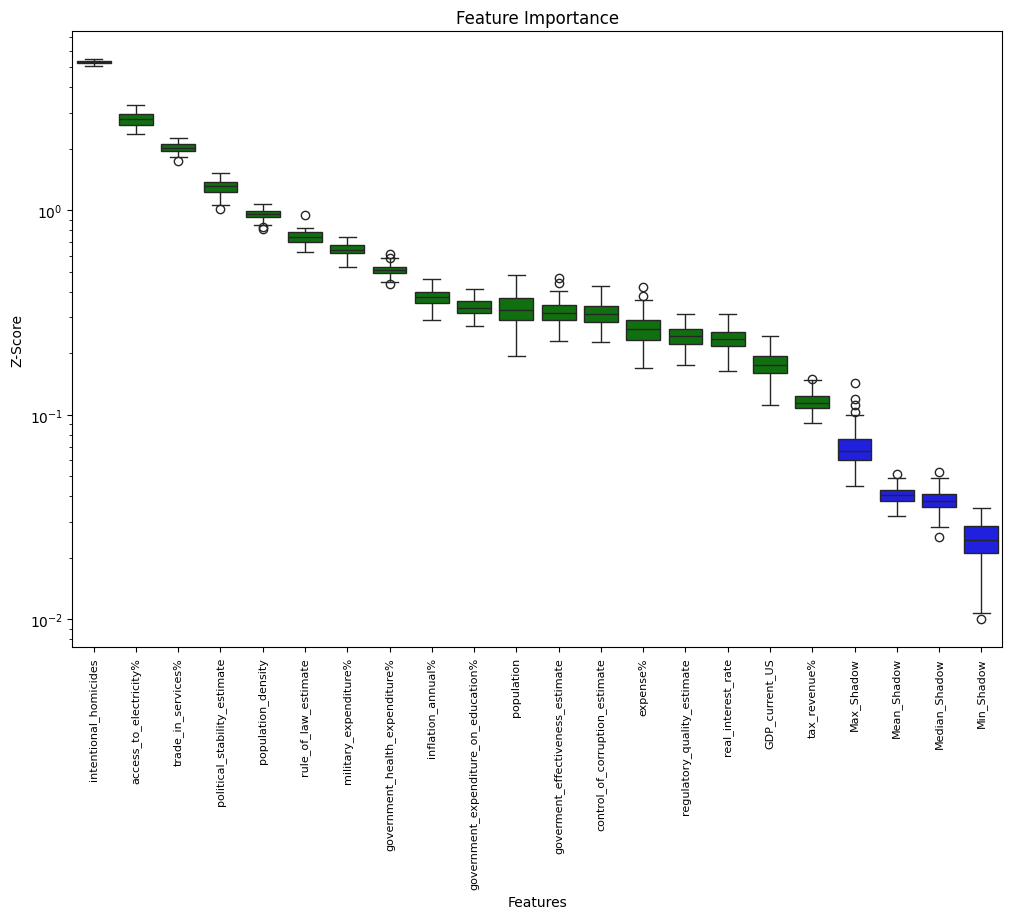

In [79]:
fig = Feature_Selector.plot(which_features='all')